<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              500 non-null    int64  
 1   Age                     500 non-null    int64  
 2   Gender                  500 non-null    object 
 3   PurchaseAmount          500 non-null    float64
 4   PurchaseFrequency       500 non-null    int64  
 5   ProductQualityRating    500 non-null    int64  
 6   DeliveryTimeRating      500 non-null    int64  
 7   CustomerServiceRating   500 non-null    int64  
 8   WebsiteEaseOfUseRating  500 non-null    int64  
 9   ReturnRate              500 non-null    float64
 10  DiscountUsage           500 non-null    float64
 11  LoyaltyProgramMember    500 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 47.0+ KB
None
CustomerID                0
Age                       0
Gender                    0
P

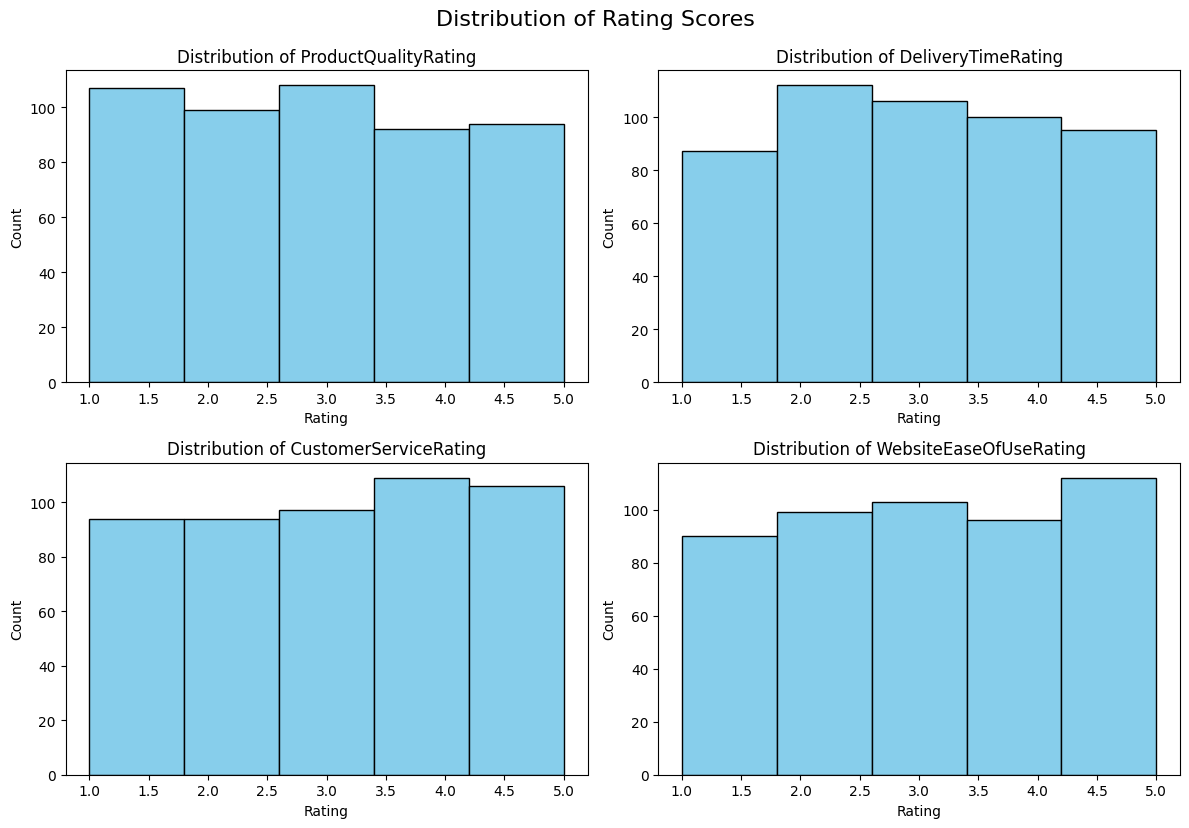

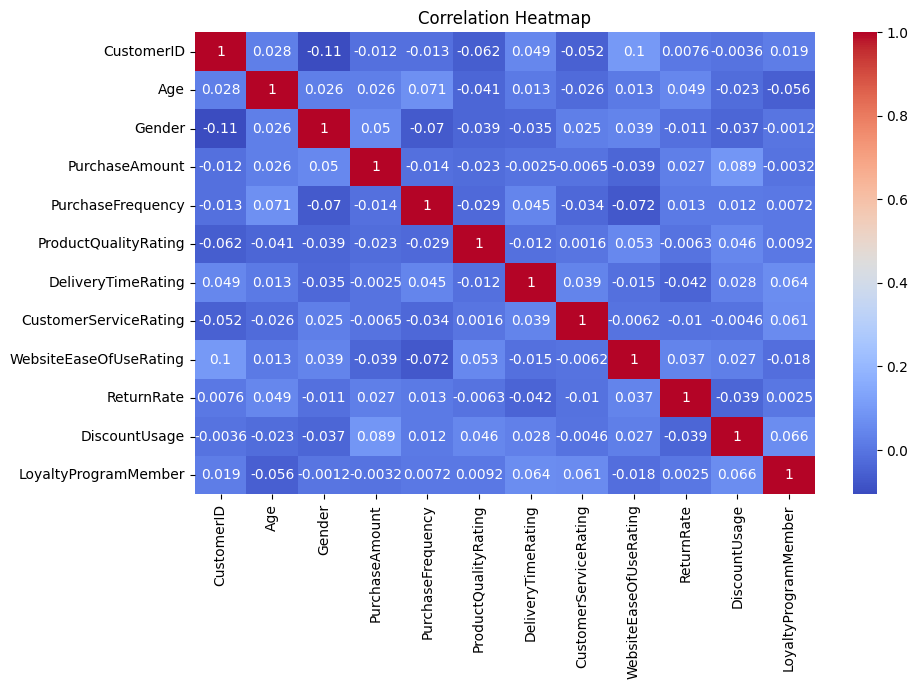

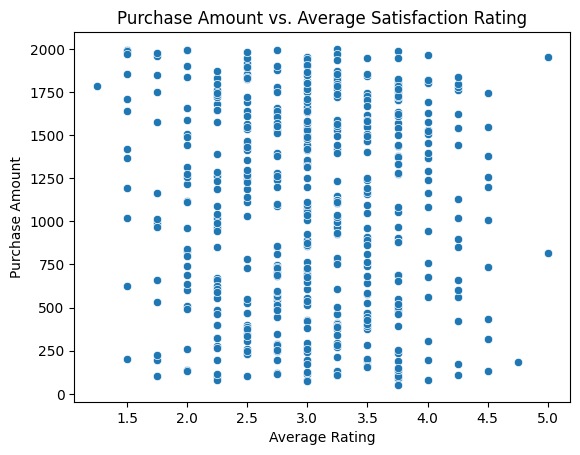

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.94      0.78        65
           1       0.56      0.14      0.23        35

    accuracy                           0.66       100
   macro avg       0.61      0.54      0.50       100
weighted avg       0.63      0.66      0.59       100

Confusion Matrix:
 [[61  4]
 [30  5]]
Accuracy Score: 0.66


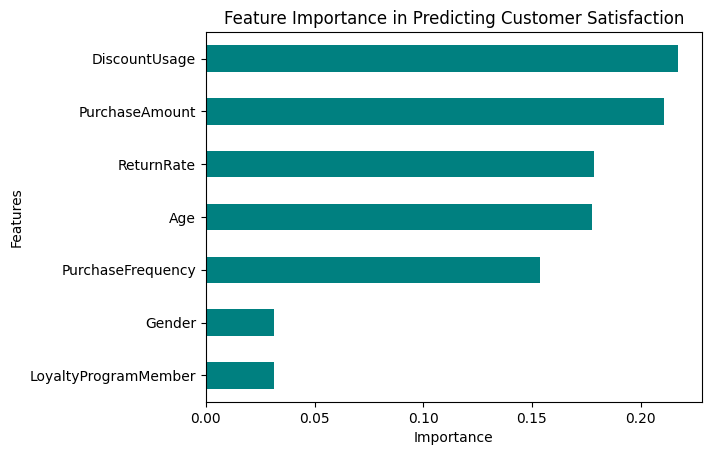

Cleaned dataset saved as 'Cleaned_Customer_Satisfaction.csv'


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load Dataset
df = pd.read_csv(r'D:\data science projects\13Coaching_Customer satisfication analysis\E-commerce_NPA_Dataset.csv')

# Step 2: Data Preprocessing
print(df.info())
print(df.isnull().sum())

df['LoyaltyProgramMember'] = df['LoyaltyProgramMember'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Step 3: Exploratory Data Analysis
rating_columns = ['ProductQualityRating', 'DeliveryTimeRating', 'CustomerServiceRating', 'WebsiteEaseOfUseRating']

# A. Improved Distribution of Ratings
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, col in enumerate(rating_columns):
    axes[idx].hist(df[col], bins=5, color='skyblue', edgecolor='black')
    axes[idx].set_title(f"Distribution of {col}")
    axes[idx].set_xlabel("Rating")
    axes[idx].set_ylabel("Count")

plt.tight_layout()
plt.suptitle("Distribution of Rating Scores", fontsize=16, y=1.03)
plt.show()

# B. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# C. Purchase Amount vs. Satisfaction
df['AverageRating'] = df[rating_columns].mean(axis=1)
sns.scatterplot(data=df, x='AverageRating', y='PurchaseAmount')
plt.title("Purchase Amount vs. Average Satisfaction Rating")
plt.xlabel("Average Rating")
plt.ylabel("Purchase Amount")
plt.show()

# Step 4: Feature Importance & Prediction
# Create target variable

df['Satisfaction'] = df['AverageRating'].apply(lambda x: 1 if x >= 3.5 else 0)

# Define features and target
features = ['Age', 'Gender', 'PurchaseAmount', 'PurchaseFrequency', 'ReturnRate', 
            'DiscountUsage', 'LoyaltyProgramMember']
X = df[features]
y = df['Satisfaction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature importance
importance = pd.Series(model.feature_importances_, index=features)
importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance in Predicting Customer Satisfaction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Optional: Save Cleaned Data
df.to_csv("Cleaned_Customer_Satisfaction.csv", index=False)
print("Cleaned dataset saved as 'Cleaned_Customer_Satisfaction.csv'")
